In [1]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos y normalizar

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
usr_folder = r'/content/drive/MyDrive/Big Data/Datamining/Practica/2025_Datasets_Datamining' # Albert

In [4]:
usr_folder = r'/content/drive/MyDrive/Master/Data Mining/Prácticas Data Mining/2025_Datasets_Datamining' # Wenjie#

In [5]:
output_folder = usr_folder +  '/dataset_lite/Output'

In [6]:
# Se lee el CSV aplicando los conversores
df = pd.read_csv(output_folder + "/features_upsampling.csv")
df.tail()

,zcr_1,zcr_2,zcr_3,zcr_4,zcr_5,zcr_6,zcr_7,zcr_8,zcr_9,zcr_10,...,delta2_mfcc_13_165,delta2_mfcc_13_166,delta2_mfcc_13_167,delta2_mfcc_13_168,delta2_mfcc_13_169,delta2_mfcc_13_170,delta2_mfcc_13_171,delta2_mfcc_13_172,delta2_mfcc_13_173,ship
4347,0.007044,0.013484,0.015041,0.013324,0.020044,0.019173,0.026135,0.028262,0.029992,0.032342,...,-0.081803,-0.367965,-0.395403,-0.326765,0.138960,0.390437,0.469228,0.406062,0.146983,Tug
4348,0.130323,0.211049,0.287656,0.293977,0.280268,0.238891,0.187044,0.131666,0.088767,0.055389,...,-0.443518,-0.392126,0.044809,0.478780,0.768694,0.594729,0.066847,-0.336104,-0.464424,Tug
4349,0.000488,0.000554,0.000753,0.000331,0.000331,0.000264,0.000132,0.000264,0.000397,0.000463,...,0.505860,0.273407,-0.059955,0.213428,0.517738,0.297803,0.218956,0.240117,-0.059945,Tug
4350,0.012884,0.020781,0.029078,0.028389,0.029189,0.027290,0.027590,0.029889,0.031454,0.046836,...,0.744246,0.734697,0.151671,0.096206,-0.104409,-0.237571,-0.149374,0.137438,0.143293,Tug
4351,0.051367,0.084218,0.114570,0.127825,0.132565,0.139569,0.150019,0.160084,0.159530,0.155813,...,-0.224293,-0.255093,-0.131576,0.140877,0.525694,0.670380,0.624501,-0.015984,-0.437976,Tug


In [8]:
numerical_cols = df.select_dtypes(include=['number']).columns

## Normalizar los datos con StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separar los datos

In [10]:
## Separación el dataframe según las características "X" y el target "y".
X = df.drop(columns=["ship"]) # Se quita el target y las caracerísticas que no se tienen que analizar

# El target es adivinar el barco.
y = df["ship"]

# División estratificada para mantener la proporción de clases en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23, stratify=y)

# Verificar la proporción de clases en train y test
print("Proporción en train:")
print(y_train.value_counts(normalize=True))

print("Proporción en test:")
print(y_test.value_counts(normalize=True))

Proporción en train:
ship
Cargo            0.250164
Passengership    0.250164
Tug              0.249836
Tanker           0.249836
Name: proportion, dtype: float64
Proporción en test:
ship
Tanker           0.250383
Tug              0.250383
Cargo            0.249617
Passengership    0.249617
Name: proportion, dtype: float64


# Entrenar modelo

In [11]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
y_train_pred = KNN.predict(X_train)

In [13]:
y_test_pred = KNN.predict(X_test)

# APLICAR CROSS VALIDATION!!!!!!!!!

cross_val_score

# Resultados

In [14]:
print("Accuracy - Datos de train: {} " .format(accuracy_score(y_train, y_train_pred)))
print("Accuracy - Datos de test: {} ". format(accuracy_score(y_test, y_test_pred)))

Accuracy - Datos de train: 0.6099803020354564 
Accuracy - Datos de test: 0.5451761102603369 


In [15]:
train_score = []
test_score = []
k_value = list(range(1, 50))

In [16]:
#Vamos a hacer un barrido con distintos hiperparámetros
for i in k_value:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_train_pred = KNN.predict(X_train)
    train_score.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = KNN.predict(X_test)
    test_score.append(accuracy_score(y_test, y_test_pred))

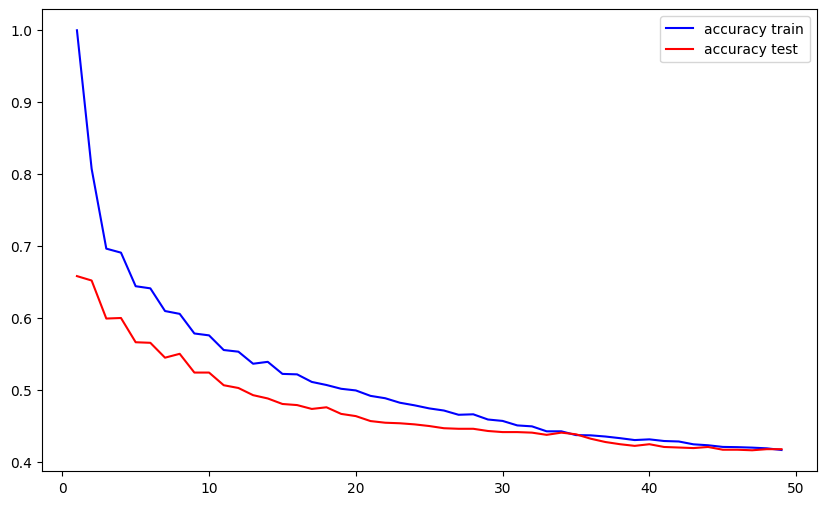

In [17]:
plt.figure(figsize=(10,6))
plt.plot(k_value, train_score, color="blue", label = "accuracy train")
plt.plot(k_value, test_score, color="red", label = "accuracy test")
plt.legend()


In [18]:
#Realizamos la misma tarea pero con un método de SKLEARN

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=KNN,
             param_grid={'n_neighbors': [1, 30]},scoring='accuracy', return_train_score=True,verbose=1)
# hacemos fit del modelo
grid_search=grid.fit(X_train, y_train)
#Hace 5-fold cross validation automáticamente

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [19]:
print("El mejor parámetro ha sido: " + str(grid_search.best_params_))
accuracy = grid_search.best_score_ *100
print("Con una accuracy de : {:.2f}%".format(accuracy) )

El mejor parámetro ha sido: {'n_neighbors': 1}
Con una accuracy de : 64.58%


In [20]:
#Ahora evaluamos los datos de test con el mejor hiperparámetro encontrado
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_predict= KNN.predict(X_test)
test_accuracy=accuracy_score(y_test,y_predict)*100

print("La accuracy en test ha sido de: {:.2f}%".format(test_accuracy) )

La accuracy en test ha sido de: 65.85%


# Save model

In [21]:
import pickle

model_folder = usr_folder +  '/dataset_lite/Modelos'
# save
with open(model_folder+'/model_KNN_Upsampling.pkl','wb') as f:
    pickle.dump(KNN,f)
